# The purpose is to show the SED of stars

## Definitions of the libraries

In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import astropy
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [3]:
import pandas as pd
import os
import re

In [4]:
from astroquery.simbad import Simbad

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
top_pysynphot_data_dir=os.environ['PYSYN_CDBS']

In [7]:
import pysynphot as S
S.primary_area=6*1e4
S.binning=10.

## Defines where are the data

In [8]:
dir_star='calspec'
dir_nostar='grid'

In [9]:
dir_submodels=['ags','bpgs','extinction','jacobi','phoenix','bc95','bz77','galactic','k93models','pickles','bkmodels','ck04models','gunnstryker','kc96']

## where are the files

In [10]:
SEDfile_dir=os.path.join(top_pysynphot_data_dir,dir_star)

In [11]:
filelist=os.listdir(SEDfile_dir) 

In [12]:
fits_files = [f for f in os.listdir(SEDfile_dir) if f.endswith('.fits')]

## Find the star-names in the files

In [13]:
star_header = []
star_file_calspec = []
for filename in filelist:
    index=0
    if re.search('fits',filename):  #example of filename filter
        index+=1
        fullfilename = os.path.join(SEDfile_dir,filename)
        hdr = fits.getheader(fullfilename)
        star_header.append(hdr)
        star_file_calspec.append(filename)

    START STIS                                                                   [astropy.io.fits.card]
FILE WRITTEN BY ECHLREDUCE.PRO ON 11-Jun-2013 11:27:39.00                        [astropy.io.fits.card]
coadd list for E*H:                                                              [astropy.io.fits.card]
 o57u01030 obb001040 obb005010 obb005020 obb001010 obb001090 obb005030           [astropy.io.fits.card]
 obb005040 obb001060 obb001030 o57u01020 obb001050 obb001020 obb0010a0           [astropy.io.fits.card]
 obb001070 o6hb100f0 obb001080 o57u01040 o5i011010 o5i011020 o5i011030           [astropy.io.fits.card]
 obb0010b0 obb002090 obb0020b0 obb002010 obb002030 o6hb20060 obb002020           [astropy.io.fits.card]
 o6hb20070 obb002040 o6hb20080 obb002050 obb002060 o6hb20090 obb002070           [astropy.io.fits.card]
 obb002080 obb0020a0 obb0020c0 obb0020d0 obb004080 obb053040 obb053080           [astropy.io.fits.card]
 obb053010 obb053020 obb053030 obb053050 obb053060 obb0530a0 obb

In [14]:
star_names = []
index=0
for hdr in star_header: 
    print index
    if index!=433:
        star_name=star_header[index]['TARGETID']
        star_names.append(star_name)
        index+=1
    else:
        print '>>>>>> skip file # ',index, 'BAD HEADER'
        print '>>>>>> filename = ', filelist[index]
        print hdr
        index+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [15]:
print star_names

['10LAC', '10LAC', '10LAC', '1732526', '1732526', '1732526', '1732526', '1740346', '1740346', '1740346', '1740346', '1740346', '1743045', '1743045', '1743045', '1743045', '1743045', '1757132', '1757132', '1757132', '1802271', '1802271', '1802271', '1802271', '1805292', '1805292', '1805292', '1805292', '1805292', '1808347', '1808347', '1808347', '1812095', '1812095', '1812095', '1812095', '1812095', '1812524', '1812524', '1812524', '2M003618', '2M0036+18', '2M0036+18', '2M0036+18', '2M0036+18', '2M0036+18', '2M0559-14', '2M0559-14', '2M0559-14', '2M0559-14', '2M0559-14', '2M0559-14', 'AGK+81D266', 'AGK+81D266', 'AGK+81D266', 'AGK+81D266', 'AGK+81D266', 'AGK+81D266', 'AGK+81D266', 'ALPHA-LYR', 'ALPHA-LYR', 'ALPHA_LYR_MOD', 'ALPHA_LYR_MOD', 'ALPHA_LYR', 'ALPHA_LYR', 'ALPHA_LYR', 'ALPHA_LYR', 'ALPHA_LYR', 'ALPHA_LYR', 'ALPHA_LYR', 'BD02D3375', 'BD02D3375', 'BD02D3375', 'BD17D4708', 'BD17D4708', 'BD21D0607', 'BD21D0607', 'BD21D0607', 'BD26D2606', 'BD26D2606', 'BD26D2606', 'BD29D2091', 'BD29

## Sort the star names

In [16]:
star_names_sorted=sorted(star_names,key=star_names.count,reverse=True) 

## Make every star name in upper case

In [17]:
star_names_sorted_upper = map(lambda s: s.upper(), star_names_sorted)

## Remove multiple entries

In [18]:
star_names_set=set(star_names_sorted_upper)

## Make a dictionary of filenames

In [19]:
StarDict= {}
for star in star_names_set:
    print star,': \n'
    star_set_of_file= []
    tag_upper='^'+star.upper()+'*'
    tag_lower='^'+star.lower()+'*'
    for thefile in fits_files:
        if re.search(tag_upper,thefile) or re.search(tag_lower,thefile):         
            star_set_of_file.append(thefile)
    #StarDict[star]=sorted(star_set_of_file,key=star_names.count,reverse=True)
    StarDict[star]=sorted(star_set_of_file,key=star_names.count)
    print StarDict[star] ,'\n'
    
            
    

P177D : 

['p177d_001.fits', 'p177d_stis_001.fits', 'p177d_stisnic_001.fits', 'p177d_stisnic_002.fits', 'p177d_stisnic_003.fits', 'p177d_stisnic_004.fits', 'p177d_stisnic_005.fits', 'p177d_stisnic_006.fits'] 

BD+33D2642 : 

[] 

WD1657_343 : 

['wd1657_343_mod_001.fits', 'wd1657_343_mod_002.fits', 'wd1657_343_mod_003.fits', 'wd1657_343_mod_004.fits', 'wd1657_343_mod_005.fits', 'wd1657_343_stisnic_001.fits', 'wd1657_343_stisnic_002.fits', 'wd1657_343_stisnic_003.fits', 'wd1657_343_stisnic_004.fits', 'wd1657_343_stisnic_005.fits', 'wd1657_343_stisnic_006.fits'] 

G191B2B_NIC : 

['g191b2b_nic_001.fits'] 

BD21D0607 : 

['bd21d0607_stis_001.fits', 'bd21d0607_stis_002.fits', 'bd21d0607_stis_003.fits'] 

HD14943 : 

['hd14943_stis_001.fits', 'hd14943_stis_002.fits', 'hd14943_stis_003.fits'] 

HD37725 : 

['hd37725_stis_001.fits', 'hd37725_stis_002.fits', 'hd37725_stis_003.fits'] 

1743045 : 

['1743045_nic_001.fits', '1743045_nic_002.fits', '1743045_stisnic_001.fits', '1743045_stisnic_002.

## Plot the SED

Warning, 15 of 1254 bins contained negative fluxes; they have been set to zero.
Warning, 22 of 4682 bins contained negative fluxes; they have been set to zero.
Warning, 27 of 4682 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 2064 bins contained negative fluxes; they have been set to zero.
Warning, 15 of 1254 bins contained negative fluxes; they have been set to zero.
Warning, 3 of 4683 bins contained negative fluxes; they have been set to zero.
Warning, 48 of 4573 bins contained negative fluxes; they have been set to zero.
Warning, 44 of 4685 bins contained negative fluxes; they have been set to zero.
Warning, 19 of 3740 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 3739 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 3738 bins contained negative fluxes; they have been set to zero.
Warning, 17 of 3740 bins contained negative fluxes; they have been set to zero.
Warning, 1 of 2840 bins contained negative

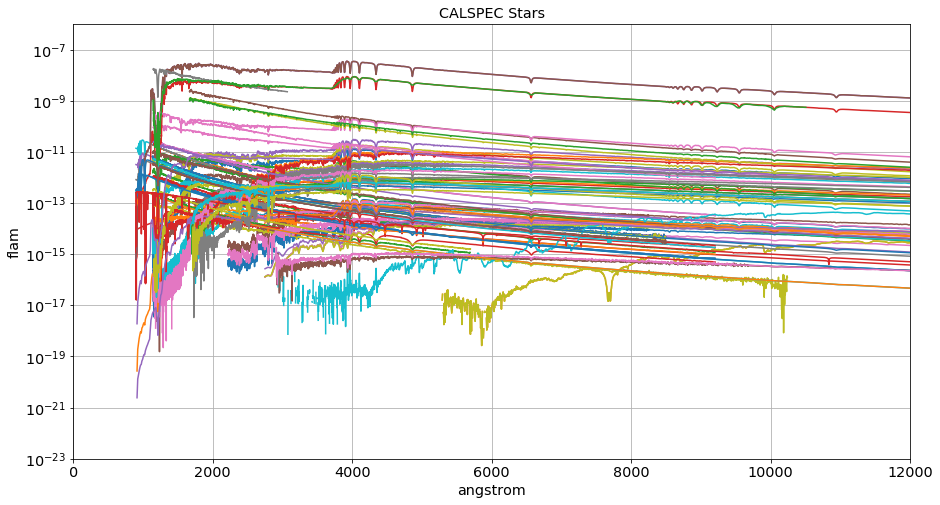

In [22]:
for keystar in StarDict:
    the_files=StarDict[keystar]
    if(len(the_files))>0 and keystar != 'SUN_REFERENCE':
        #print sorted(the_files,reverse=True)
        
        selected_file=the_files[0]
        selected_fullfile=os.path.join(SEDfile_dir,selected_file)
        
        sed=S.FileSpectrum(selected_fullfile)
        
        plt.semilogy(sed.wave,sed.flux,label=keystar)
        plt.xlim(0, 12000)
        plt.ylim(1e-23, 1e-6)
        plt.xlabel(sed.waveunits)
        plt.ylabel(sed.fluxunits)
        plt.grid(True)
 #       plt.legend(loc='best')
#    plt.title(os.path.basename(S.Vega.name))
    plt.title("CALSPEC Stars")
plt.savefig("calspec.png")